In [7]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
from tensorflow.keras.models import load_model

# PD Control Training Data

In [14]:
foldername = "test_data"

# get pd data
filepath_pd = os.path.join(foldername, 'test_pd_data.csv')
df_pd = pd.read_csv(filepath_pd)

x_pd = df_pd['cur_pos_x'].values
y_pd = df_pd['cur_pos_z'].values
ytrue = df_pd['steering_angle']

# get ground truth data
filepath_gt = os.path.join(foldername, 'gt_udem1.csv')
df_gt = pd.read_csv(filepath_gt)

x_gt = df_gt['bez_x'].values
y_gt = df_gt['bez_z'].values

## Raw Data - Base Model

In [15]:
model_name = "base_dnn_model_raw_pd"

In [16]:
# get base model with raw data test results
filepath = os.path.join(foldername, f'test_{model_name}_data.csv')
df_model = pd.read_csv(filepath)

x_model = df_model['cur_pos_x'].values
y_model = df_model['cur_pos_z'].values

df_model['steering_angle'] = df_model['steering_angle'].apply(lambda x: float(x.replace('[', '').replace(']', '')))

In [17]:
# calculate test Huber loss 

def huber_loss(ytrue, ypred, delta=1.2):
    """Calculate the Huber loss between true and predicted values"""
    error = ytrue - ypred
    abs_error = np.abs(error)
    
    # Calculate Huber loss
    huber_loss = np.where(abs_error <= delta, 0.5 * error**2, delta * (abs_error - 0.5 * delta))
    
    # Return the mean Huber loss
    return np.mean(huber_loss)

# evaluate model on test data
ypred = df_model['steering_angle'].values

ytrue = ytrue[0:len(ypred)]

model_test_hl = huber_loss(ypred, ytrue)

def huber_loss_coordinates(xtrue, ytrue, xpred, ypred, delta=1.2):
    error_x = xtrue - xpred
    error_y = ytrue - ypred
    squared_error = (error_x ** 2) + (error_y ** 2)
    huber_loss = np.where(squared_error < (delta ** 2), 0.5 * squared_error, delta * np.sqrt(squared_error) - 0.5 * delta ** 2)
    return np.mean(huber_loss)

pd_xy_model_test_hl = huber_loss_coordinates(x_pd[0:len(x_model)], y_pd[0:len(y_model)], x_model, y_model)
gt_xy_model_test_hl = huber_loss_coordinates(x_gt[0:len(x_model)], y_gt[0:len(y_model)], x_model, y_model)


Model Training Huber Loss: 0.005858905613422394
Model Validation Huber Loss: 0.005812895484268665
Model Test Huber Loss: 0.12128363151771744
PD and Model Huber Loss: 0.07089005583360646
Ground Truth and Model Huber Loss: 0.06901272566555945


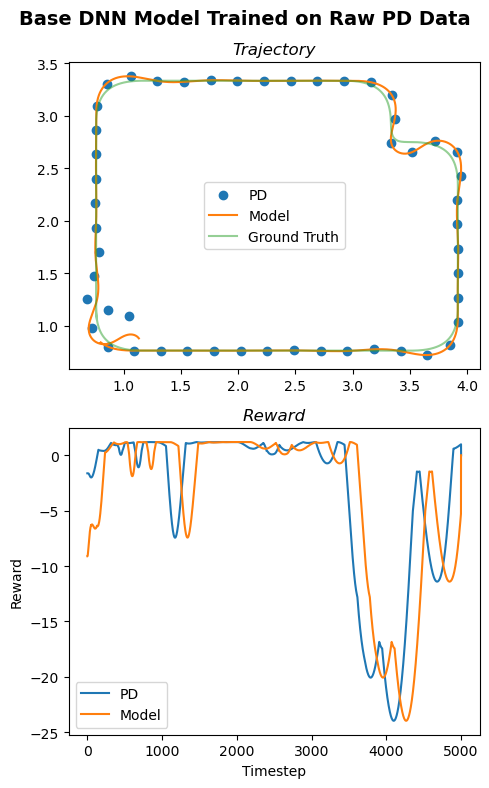

In [18]:
# plot and print data 

# create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8))

fig.suptitle("Base DNN Model Trained on Raw PD Data", fontsize=14, fontweight='bold')

# plot trajectories for qualitative comparison
ax1.scatter(x_pd[::100], y_pd[::100], label='PD', color='C0')
ax1.plot(x_model, y_model, label='Model', color='C1')
ax1.plot(x_gt, y_gt, label='Ground Truth', color='C2', alpha=0.5)
ax1.legend()
ax1.set_title("Trajectory", fontsize=12, fontstyle='italic')

# plot reward values for dnn and pd 
reward_model = df_model["reward"].values
reward_pd = df_pd["reward"].values

timestep_model = range(len(df_model))
timestep_pd = range(len(df_pd))

ax2.plot(timestep_pd, reward_pd, label='PD')
ax2.plot(timestep_model, reward_model, label='Model')
ax2.legend()
ax2.set_xlabel("Timestep")
ax2.set_ylabel("Reward")
ax2.set_title("Reward", fontsize=12, fontstyle='italic')

plt.tight_layout()

with open('models/reg_dnn_model_raw_pd_history.pkl', 'rb') as f:
    history = pickle.load(f)

model_train_hl = history["loss"][-1]
model_val_hl = history["val_loss"][-1]
print(f"Model Training Huber Loss: {model_train_hl}")
print(f"Model Validation Huber Loss: {model_val_hl}")
print(f"Model Test Huber Loss: {model_test_hl}")
print(f"PD and Model Huber Loss: {pd_xy_model_test_hl}")
print(f"Ground Truth and Model Huber Loss: {gt_xy_model_test_hl}")

## Raw Data - Regularised Model

In [19]:
model_name = "reg_dnn_model_raw_pd"

In [20]:
# get reg model with raw data test results
filepath = os.path.join(foldername, f'test_{model_name}_data.csv')
df_model = pd.read_csv(filepath)

x_model = df_model['cur_pos_x'].values
y_model = df_model['cur_pos_z'].values

df_model['steering_angle'] = df_model['steering_angle'].apply(lambda x: float(x.replace('[', '').replace(']', '')))

In [21]:
# calculate test Huber loss 

def huber_loss(ytrue, ypred, delta=1.2):
    """Calculate the Huber loss between true and predicted values"""
    error = ytrue - ypred
    abs_error = np.abs(error)
    
    # Calculate Huber loss
    huber_loss = np.where(abs_error <= delta, 0.5 * error**2, delta * (abs_error - 0.5 * delta))
    
    # Return the mean Huber loss
    return np.mean(huber_loss)

# evaluate model on test data
ypred = df_model['steering_angle'].values

ytrue = ytrue[0:len(ypred)]

model_test_hl = huber_loss(ypred, ytrue)

def huber_loss_coordinates(xtrue, ytrue, xpred, ypred, delta=1.2):
    error_x = xtrue - xpred
    error_y = ytrue - ypred
    squared_error = (error_x ** 2) + (error_y ** 2)
    huber_loss = np.where(squared_error < (delta ** 2), 0.5 * squared_error, delta * np.sqrt(squared_error) - 0.5 * delta ** 2)
    return np.mean(huber_loss)

pd_xy_model_test_hl = huber_loss_coordinates(x_pd[0:len(x_model)], y_pd[0:len(y_model)], x_model, y_model)
gt_xy_model_test_hl = huber_loss_coordinates(x_gt[0:len(x_model)], y_gt[0:len(y_model)], x_model, y_model)

Model Training Huber Loss: 0.005858905613422394
Model Validation Huber Loss: 0.005812895484268665
Model Test Huber Loss: 0.13287707604863996
PD and Model Huber Loss: 0.050529823841131805
Ground Truth and Model Huber Loss: 0.048734817646841726


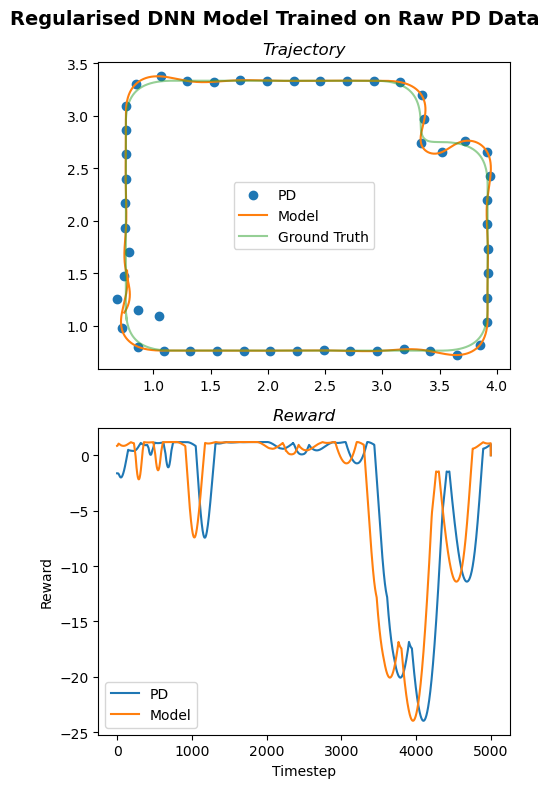

In [22]:
# plot and print data 

# create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,8))

fig.suptitle("Regularised DNN Model Trained on Raw PD Data", fontsize=14, fontweight='bold')

# plot trajectories for qualitative comparison
ax1.scatter(x_pd[::100], y_pd[::100], label='PD', color='C0')
ax1.plot(x_model, y_model, label='Model', color='C1')
ax1.plot(x_gt, y_gt, label='Ground Truth', color='C2', alpha=0.5)
ax1.legend()
ax1.set_title("Trajectory", fontsize=12, fontstyle='italic')

# plot reward values for dnn and pd 
reward_model = df_model["reward"].values
reward_pd = df_pd["reward"].values

timestep_model = range(len(df_model))
timestep_pd = range(len(df_pd))

ax2.plot(timestep_pd, reward_pd, label='PD')
ax2.plot(timestep_model, reward_model, label='Model')
ax2.legend()
ax2.set_xlabel("Timestep")
ax2.set_ylabel("Reward")
ax2.set_title("Reward", fontsize=12, fontstyle='italic')

plt.tight_layout()

model_train_hl = history["loss"][-1]
model_val_hl = history["val_loss"][-1]
print(f"Model Training Huber Loss: {model_train_hl}")
print(f"Model Validation Huber Loss: {model_val_hl}")
print(f"Model Test Huber Loss: {model_test_hl}")
print(f"PD and Model Huber Loss: {pd_xy_model_test_hl}")
print(f"Ground Truth and Model Huber Loss: {gt_xy_model_test_hl}")